# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Data Wrangling with Pandas 

Pandas is a very useful Python library for data manipulation and exploration. We have so much more to explore!

In this lesson, we'll continue exploring Pandas for EDA. Specifically: 

- Identify and handle missing values with Pandas.
- Add and remove columns
- Merge datasets
- Implement groupby statements in the **Split-Apply-Combine** technique
- Use apply functions to clean data with Pandas.

We'll implicitly review many functions from our first Pandas lesson along the way!

## The Superstore dataset

We are going to continue exploring the Superstore dataset, which consist of a few tables stored as .csv files. We will focus on: 

- Products Table (products.csv)
- Orders Table (orders.csv)
- Returns Table (returns.csv)

For this Lab, we will explore the Orders Table. 

The data dictionary for the Orders table:
- **order_id** - The order identifier value for each order.
- **order_date** - The date the order was placed.
- **ship_date** - The date the order was shipped.
- **ship_mode** - 	The method with which the order was shipped.
- **customer_id** - 	The unique identifier value for the customer who placed the order
- **product_id** - 	The unique identifier value for the product in the order. There may be more than one product ordered for each order_id.
- **sales** - 	The amount of money spent on this particular product in this order
- **quantity** - 	The quantity of this particular product ordered.
- **discount** - 	The discount offered by the sales representative for this product in ths order.
- **profit** -  The amount of profit earned from this order
- **profit_margin** - The profit margin earned from this order


### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the dataset


In [3]:
# read in the orders dataset


In [4]:
# Check the first 5 rows


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.4,-255.864,-0.55
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,NaN,102.060,NaN
2,IN-2020-21206,07/02/2020,12/02/2020,NaN,SC-20800,FUR-BO-10000035,1236.330,3,0.0,519.210,NaN
3,IN-2019-50060,07/09/2019,14/09/2019,NaN,MC-17575,FUR-BO-10000035,2472.660,6,NaN,1038.420,NaN
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.1,923.013,NaN


In [5]:
# and the number of rows x cols


(10923, 11)

In [6]:
# and the data types


order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
product_id        object
sales            float64
quantity           int64
discount         float64
profit           float64
profit_margin    float64
dtype: object

In [7]:
# Check the info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10923 non-null  object 
 1   order_date     10923 non-null  object 
 2   ship_date      10923 non-null  object 
 3   ship_mode      10919 non-null  object 
 4   customer_id    10923 non-null  object 
 5   product_id     10923 non-null  object 
 6   sales          10923 non-null  float64
 7   quantity       10923 non-null  int64  
 8   discount       10899 non-null  float64
 9   profit         10923 non-null  float64
 10  profit_margin  10912 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 938.8+ KB


## Handling missing data

Missing data is a systemic, challenging problem in data collection. Imagine conducting a poll, but some of the data gets lost, or you run out of budget and can't complete it! 😮<br><br>

"Handling missing data" itself is a broad topic. We'll focus on two components:

- Using Pandas to identify we have missing data
- Strategies to fill in missing data (known in the business as `imputing`)
- Filling in missing data with Pandas


### Identifying missing data

Before *handling*, we must identify we're missing data at all!

We have a few ways to explore missing data, and they are reminiscient of our Boolean filters.

First we will use `notnull()` and `isnull()` - can you guess what these will do?

In [8]:
# notnull() returns True when data isn't missing


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,False,True,False
2,True,True,True,False,True,True,True,True,True,True,False
3,True,True,True,False,True,True,True,True,False,True,False
4,True,True,True,True,True,True,True,True,True,True,False


In [9]:
# isnull() returns True when data is missing


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,True


Now, we may want to see null values in aggregate. We can use `sum()` to sum down a given column.

In [10]:
# here is a quick and dirty way to do it
orders.isnull().sum() 

# counts the number of missing values
#in each column of the dataframe

order_id          0
order_date        0
ship_date         0
ship_mode         4
customer_id       0
product_id        0
sales             0
quantity          0
discount         24
profit            0
profit_margin    11
dtype: int64

Look! We've found missing values!

How could this missing data be problematic for our analysis?

### Understanding missing data

Finding missing data is the easy part! Determining what to do next is more complicated.

Typically, we are most interested in knowing **why** we are missing data. Once we know what 'type of missingness' we have (the source of missing data), we can proceed effectively.

Let's first quantify how much data we are missing. Here is another implementation of `orders.isnull().sum()`, only wrapped with a `DataFrame` and some labels to make it a little more user-friendly:

In [11]:
# or we can make things pretty as follows

# create a new DataFrame to store the information about nulls
null_df = pd.DataFrame(orders.isnull().sum(), columns=['Count of Nulls']) 

 
#null_df.index.name = "Column"
null_df.sort_values(['Count of Nulls'], ascending=False)

,Count of Nulls
discount,24
profit_margin,11
ship_mode,4
order_id,0
order_date,0
ship_date,0
customer_id,0
product_id,0
sales,0
quantity,0


### Filling in missing data

How we fill in data depends largely on why it is missing (types of missingness) and what sampling we have available to us.

We may:

- Delete missing data altogether
- Fill in missing data with:
    - The average of the column
    - The median of the column
    - A predicted amount based on other factors
- Collect more data:
    - Resample the population
    - Follow up with the authority providing data that is missing


In our case, let's focus on handling missing values in `ship_mode`. Let's get a count of the unique values in that column. We will need to use the `dropna=False` kwarg, otherwise the `pd.Series.value_counts()` method will not count `NaN` (null) values.

In [12]:
# let's get a value count with the nulls included
orders['ship_mode'].value_counts(dropna=False)

Standard Class    6611
Second Class      2199
First Class       1576
Same Day           533
NaN                  4
Name: ship_mode, dtype: int64

Ahoy! We have 4 nulls!

Option 1: Drop the missing values.

In [13]:
# drops rows where any row has a missing value - 
# this does not happen *in place*, 
# so we are not actually dropping any rows

orders['ship_mode'].dropna()

0          Second Class
1           First Class
4        Standard Class
5          Second Class
6           First Class
              ...      
10918          Same Day
10919      Second Class
10920    Standard Class
10921    Standard Class
10922    Standard Class
Name: ship_mode, Length: 10919, dtype: object

In [14]:
# Check that the 4 nulls were dropped from the original row count
orders.shape[0]- 4


10919

**Important!** `pd.DataFrame.dropna()` and `pd.Series.dropna()` are very versatile! Let's look at the docs (Series is similar):

```python
Signature: pd.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. deprecated:: 0.23.0: Pass tuple or list to drop on multiple
    axes.
how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.
thresh : int, optional
    Require that many non-NA values.
subset : array-like, optional
    Labels along other axis to consider, e.g. if you are dropping rows
    these would be a list of columns to include.
inplace : bool, default False
    If True, do operation inplace and return None.
```

**how**: This tells us if we want to remove a row if _any_ of the columns have a null, or _all_ of the columns have a null.<br>
**subset**: We can input an array here, like `['ship_mode', 'discount', 'profit_margin']`, and it will only consider nulls in those columns. This is very useful!<br>
**inplace**: This is if you want to mutate (change) the source dataframe. Default is `False`, so it will return a _copy_ of the source dataframe.

To accomplish the same thing, but implement it on our entire dataframe, we can do the following:

In [15]:
# drops all nulls from the ship_mode column, 
#but returns the entire dataframe instead of just the ship_mode column

orders.dropna(subset=['ship_mode'])

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.1560,2,0.40,-255.8640,-0.55
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.0600,2,NaN,102.0600,NaN
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.2930,7,0.10,923.0130,NaN
5,IN-2022-23894,02/04/2022,05/04/2022,Second Class,LP-17095,FUR-BO-10000035,766.5246,2,0.07,288.4446,0.38
6,IN-2021-25560,26/07/2021,29/07/2021,First Class,GH-14425,FUR-BO-10000035,1236.3300,3,0.00,519.2100,0.42
...,...,...,...,...,...,...,...,...,...,...,...
10918,IN-2019-70780,04/10/2019,04/10/2019,Same Day,JK-15205,TEC-PH-10004959,780.1650,5,0.10,320.7150,0.41
10919,IN-2020-54358,22/01/2020,24/01/2020,Second Class,CS-12400,TEC-PH-10004959,346.7400,2,0.00,162.9600,0.47
10920,IN-2020-49073,21/03/2020,27/03/2020,Standard Class,BG-11695,TEC-PH-10004959,173.3700,1,0.00,81.4800,0.47
10921,IN-2020-19687,01/06/2020,05/06/2020,Standard Class,CL-11890,TEC-PH-10004959,346.7400,4,0.50,-20.8200,-0.06


In [16]:
# Check that the original dataframe was not actually changed, because default is inplace=False
orders.shape

(10923, 11)

Option 2: Fill in missing values

Traditionally, we fill missing data with a median, average, or mode (most frequently occurring). For `ship_mode`, let's replace the nulls with the mode, `Standard_Class`.

Let's first look at the way we'd do it with a single column, using the `pd.Series.fillna()` method:

In [17]:
orders['ship_mode'].fillna(value="Standard Class")

0          Second Class
1           First Class
2        Standard Class
3        Standard Class
4        Standard Class
              ...      
10918          Same Day
10919      Second Class
10920    Standard Class
10921    Standard Class
10922    Standard Class
Name: ship_mode, Length: 10923, dtype: object

In [17]:
# Since we didn't set inplace = True, the original dataframe is not changed
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.4,-255.864,-0.55
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,NaN,102.060,NaN
2,IN-2020-21206,07/02/2020,12/02/2020,NaN,SC-20800,FUR-BO-10000035,1236.330,3,0.0,519.210,NaN
3,IN-2019-50060,07/09/2019,14/09/2019,NaN,MC-17575,FUR-BO-10000035,2472.660,6,NaN,1038.420,NaN
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.1,923.013,NaN


Now let's see how we'd do it to the whole dataframe, using the `pd.DataFrame.fillna()` method. Notice the similar API between the methods with the `value` kwarg. Good congruent design, pandas development team! The full dataframe is returned, and not just a column.

In [18]:
orders.fillna(value={"ship_mode":"Standard Class","discount":0}).head(10)

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.1560,2,0.40,-255.8640,-0.55
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.0600,2,0.00,102.0600,NaN
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.3300,3,0.00,519.2100,NaN
3,IN-2019-50060,07/09/2019,14/09/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.6600,6,0.00,1038.4200,NaN
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.2930,7,0.10,923.0130,NaN
5,IN-2022-23894,02/04/2022,05/04/2022,Second Class,LP-17095,FUR-BO-10000035,766.5246,2,0.07,288.4446,0.38
6,IN-2021-25560,26/07/2021,29/07/2021,First Class,GH-14425,FUR-BO-10000035,1236.3300,3,0.00,519.2100,0.42
7,IN-2022-66062,29/01/2022,02/02/2022,Standard Class,RB-19705,FUR-BO-10000071,336.6000,2,0.00,158.1600,0.47
8,IN-2021-34401,01/12/2021,05/12/2021,Standard Class,SS-20410,FUR-BO-10000071,504.9000,3,0.00,237.2400,0.47
9,IN-2021-17048,03/12/2021,09/12/2021,Standard Class,SH-19975,FUR-BO-10000071,530.1450,5,0.37,84.0450,0.16


But wait! There's more! We can reference any other data or formulas we want with the imputation (the value we fill the nulls with). This is very handy if you want to impute with the average or median of that column... or even another column altogether! 

Here is an example where we will fill the nulls of :
- `discount` with the mean value from the `discount` column
- `ship_mode` with the most frequently occuring value (mode)
- `profit_margin` with the result of `profit/sales`.



In [19]:
# Check the mean value of discount


0.14984677493347998

In [20]:
# Check the most frequently occurring ship_mode


0    Standard Class
dtype: object

Note that this returns `0    Standard Class` 

This is because a the `mode()` function returns a Series, as there may be more than one mode. So if we just want the first value returned, we can use the index 0.


In [21]:
# Get the first answer from the mode()


'Standard Class'

Now we can also check the result of `profit/sales` which will be calculated for each row, and returned as a Series:

0       -0.550061
1        0.419896
2        0.419961
3        0.419961
4        0.355512
           ...   
10918    0.411086
10919    0.469978
10920    0.469978
10921   -0.060045
10922    0.469978
Length: 10923, dtype: float64

Now we are ready to use a dictionary to fill the missing values!

In [18]:
orders.fillna(value={'ship_mode':orders['ship_mode'].mode()[0],
                     'discount':orders['discount'].mean(),
                     'profit_margin':orders['profit']/orders['sales']}).head(5)

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961
3,IN-2019-50060,07/09/2019,14/09/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512


#### Really filling in the missing values

When we are sure the logic is correct, we can set `inplace=True` to make the changes permanent.

But first, to be safe... make a copy!

In [19]:
# Make a copy first!
orders_copy = orders.copy()

# Then fill missing values for the specific columns, inplace
orders.fillna(value={'ship_mode':orders['ship_mode'].mode()[0],
                     'discount':orders['discount'].mean(),
                     'profit_margin':orders['profit']/orders['sales']},
             inplace = True)


order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
product_id       0
sales            0
quantity         0
discount         0
profit           0
profit_margin    0
dtype: int64

In [ ]:

# Check if there are any more nulls
orders.isnull().sum()

In [20]:
# Can copy back if you need to!
#orders = orders_copy.copy()
#orders.isnull().sum()

They're gone! Important points:

- Don't forget to use the `inplace=True` kwarg to mutate the source dataframe (i.e. 'save changes'). 
- It is helpful to not use `inplace=True` initially to ensure your code/logic is correct, prior to making permanent changes.

## Renaming Columns

Perhaps we want to rename our columns. 

Let's do it with the products table. Read it in and check the first five rows:


In [21]:
# First read in the Products table

# check the first five rows


,product_id,category,sub_category,product_name,product_cost_to_consumer
0,FUR-BO-10000008,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,FUR-BO-10000021,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04
3,FUR-BO-10000071,Furniture,Bookcases,"Safco 3-Shelf Cabinet, Metal",89.22
4,FUR-BO-10000087,Furniture,Bookcases,"Dania Classic Bookcase, Mobile",392.64


The column `product_cost_to_consumer` is actually the unit cost of each product, so let's make it a shorter name.

One way is to rename **specific** columns by using a dictionary:

In [22]:
# rename one or more columns with a dictionary. Note: inplace=False will return a new DataFrame,
# but leave the original DataFrame untouched. Change this to True to modify the original DataFrame.

# use a dictionary with old column names as the key and new names as the value

#old_to_new = {'product_name': 'description', 'product_cost_to_consumer': 'unit_cost'}

#products.rename(columns=old_to_new, inplace=False).head(3)

,product_id,category,sub_category,description,unit_cost
0,FUR-BO-10000008,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,FUR-BO-10000021,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04


**Note** that the above example has the argument `inplace = False`, so the original DataFrame has not been changed.

Let's set `inplace=True` and change only the `product_cost_to_customer` column name.

In [23]:
# use a dictionary with old column names as the key and new names as the value
# Now inplace=True so the change is permanent


,product_id,category,sub_category,product_name,unit_cost
0,FUR-BO-10000008,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,FUR-BO-10000021,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04


## Merging Data

You may have noticed that the Orders table doesn't give us information about the product name, product category or subcategory but we may want to get information about the total sales.

We also want to check whether orders have been returned.

To do this, we will have to merge the data from separate tables together, just like we do a JOIN in SQL.

We can do this in Pandas using `merge()`.



#### Merging two DataFrames

We merge two DataFrames using the Pandas `merge` function.

`pd.merge(left, right, how='inner', on=IndexLabel, left_on=IndexLabel, right_on=IndexLabel)`

We can specify **how** to merge the two DataFrames `orders` and `prod` using the `how=` kwarg:

- `how='inner'` - only keep rows where the merge 'on' value exists in both the left and right DataFrames
- `how='left'` - keep every row in the *left* DataFrame. Unmatched columns will be filled with NaN.
- `how='right'` - keep every row in the *right* DataFrame. Unmatched columns will be filled with NaN.
- `how='outer'` - returns all rows from both left and right DataFrames and matches up rows where possible and NaN elsewhere.



#### Guided Walkthrough

Let's try to merge the **Orders** and **Products** tables so that we can analyse the sales by products.



In [24]:
# Have another look at the products table
products.head()

,product_id,category,sub_category,product_name,unit_cost
0,FUR-BO-10000008,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,FUR-BO-10000021,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04
3,FUR-BO-10000071,Furniture,Bookcases,"Safco 3-Shelf Cabinet, Metal",89.22
4,FUR-BO-10000087,Furniture,Bookcases,"Dania Classic Bookcase, Mobile",392.64


In [25]:
# Compare with the orders that we have 
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961
3,IN-2019-50060,07/09/2019,14/09/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512


#### Performing the Merge

In our case, we want to keep all rows in the `orders` DataFrame, and match the rows in the `products` DataFrame based on the `product_id`, so it should be a `left` join (if `orders` is on the left!)

In [26]:
# Merge orders (left) with products (right) using product_id

#merged = pd.merge(orders, products, how=???, on=???)
#merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin,category,sub_category,product_name,unit_cost
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04
3,IN-2019-50060,07/09/2019,14/09/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04


#### Adding New Columns

Adding a new column is easy, we just have to define it, for example using calculations on other columns.



In [27]:
# Create a column total_sales in merged which is the unit_price * quantity


In [51]:
# Check the new column
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin,category,sub_category,product_name,unit_cost,total_cost
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,721.02
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,141.00
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,717.12
3,IN-2019-50060,07/09/2019,14/09/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,1434.24
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,1673.28


#### Dropping columns

To drop a column, use `drop()` with the column name and kwarg `axis=1`. (To drop rows, we would use the row label and `axis=0)


In [28]:
#merged.drop('total_cost', axis=1, inplace = True)

In [29]:
merged.head(3)

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin,category,sub_category,product_name,unit_cost
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,IN-2020-21206,07/02/2020,12/02/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04


### Cleaning Data: `str` and `dt` methods
There are a lot of familiar string and date operations we can perform on columns. Strangely, they exist within a pandas submodule and so have to be prefixed with `str` and `dt` respectively.

In [31]:
# Making the product names lowercase
merged['product_name'].str.lower().head()

# This doesn't change the original dataframe, so you could add another column if you want the changes to be permanent.

0    sauder library with doors, traditional
1              dania corner shelving, metal
2              dania classic bookcase, pine
3              dania classic bookcase, pine
4              dania classic bookcase, pine
Name: product_name, dtype: object

In [32]:
# To use datetime methods, convert the date
merged['order_date'] = pd.to_datetime(merged['order_date'])

# Do the same for ship date
merged['ship_date'] = pd.to_datetime(merged['ship_date'])

In [94]:
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin,category,sub_category,product_name,unit_cost,days_to_ship,order_year,order_day,order_month_no,order_day_name
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3 days,2022,3,7,Thursday
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174 days,2020,4,7,Friday
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153 days,2020,3,7,Thursday
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67 days,2019,1,7,Tuesday
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122 days,2019,0,8,Monday


In [33]:
# Calculate the number of days to ship
merged['days_to_ship'] = (merged['ship_date']-merged['order_date'])

# remove the days indicator 
#merged['days_to_ship'] = (merged['ship_date']-merged['order_date']).dt.days

In [34]:
# year of order
merged['order_year'] = merged['order_date'].dt.year

# month of order (Monday, Tuesday, etc)
merged['order_month_no'] = merged['order_date'].dt.month

# day of week 
merged['order_day'] = merged['order_date'].dt.weekday

# day name of week of order (Monday, Tuesday, etc)
merged['order_day_name'] = merged['order_date'].dt.day_name()


In [92]:
merged.dtypes

order_id                   object
order_date         datetime64[ns]
ship_date          datetime64[ns]
ship_mode                  object
customer_id                object
product_id                 object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
profit_margin             float64
category                   object
sub_category               object
product_name               object
unit_cost                 float64
days_to_ship      timedelta64[ns]
order_year                  int64
order_day                   int64
order_month_no              int64
order_day_name             object
dtype: object

Great! Now we can analyse the data by **splitting** the data by `category`, `sub_category`, `year`, `month` and even the `order_day`.


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ To tackle this problem, we'll use the **Split-Apply-Combine** technique. 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in `pandas` (the **Combine** step is done for us).

- First, we use the `groupby()` statements to segment our data to a specific subsets.
- Then, we apply the function that we want to use.

The result will be the list of groups that we have specified, with the calculated value for each group. 


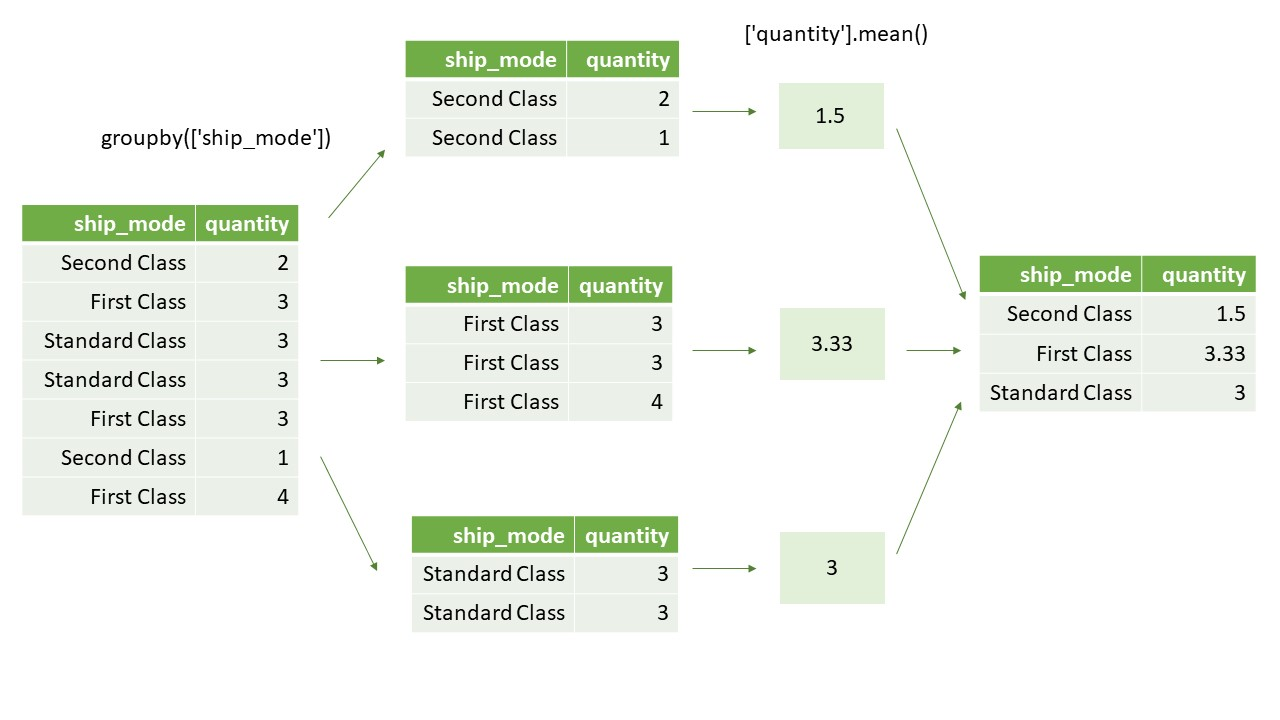



Let's try it out!

In [39]:
# If we just want to count the number of rows in the 'order_id' row


10923

Let's group by `ship_mode`, and get a count of orders for each ship mode.

In [40]:
# Counting AFTER we group by ship mode


ship_mode
First Class       1576
Same Day           533
Second Class      2199
Standard Class    6615
Name: order_id, dtype: int64

In [41]:
# Is this similar to value_counts()? What's the difference?


Standard Class    6615
Second Class      2199
First Class       1576
Same Day           533
Name: ship_mode, dtype: int64

We can see that the value_counts() is also counting by groups, and sorts by the highest value, but groupby() sorts the results in alphabetical order of the groups by default. 

However, using groupby, we can get *other* aggregated values by category, such as the *max*, *min*, *mean*, etc.


Let's find out the highest sales amount for each ship mode:

In [42]:
# find the max sales by ship mode, return as a Series


ship_mode
First Class       5175.1710
Same Day          3741.5238
Second Class      5667.8700
Standard Class    6998.6400
Name: sales, dtype: float64

In [43]:
# find the mean values for all other columns in the DataFrame by ship mode


,sales,quantity,discount,profit,profit_margin
ship_mode,,,,,
First Class,316.308534,3.704949,0.155368,36.882062,0.059780
Same Day,303.988495,3.696060,0.151219,34.858326,0.080713
Second Class,309.648138,3.731241,0.144770,34.867296,0.078786
Standard Class,335.623751,3.776871,0.150108,41.894980,0.066416


#### Quick Exercise

Find the sum of profit for each ship_mode in orders.

In [44]:
# return a series


ship_mode
First Class        58126.1292
Same Day           18579.4878
Second Class       76673.1850
Standard Class    277135.2960
Name: profit, dtype: float64

#### Multiple Aggregations On the Same Column

We can also use the `.agg()` method with multiple arguments, to simulate a `.describe()` method like we used before:

,count,mean,min,max
ship_mode,,,,
First Class,1576,316.308534,4.4100,5175.1710
Same Day,533,303.988495,6.5400,3741.5238
Second Class,2199,309.648138,2.8800,5667.8700
Standard Class,6615,335.623751,3.3231,6998.6400


#### Multi-level Groupby

We can also do multi-level groupbys. 

Remember the `merged` DataFrame where we merged the `orders` and `products`?





In [46]:
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin,category,sub_category,product_name,unit_cost,days_to_ship
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,-0.550000,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3 days
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,0.419896,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174 days
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153 days
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,0.419961,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67 days
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,0.355512,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122 days


This is referred to as a `Multiindex` dataframe. Here, we can see the following fields in a nested group by, with a count of order_ids effectively giving us a count of the number of orders for every unique ship_mode and category combination:

- Ship Mode - Second Class, First Class, Standard Class, Same Day
- Category - Furniture, Office Supplies, Technology

In [47]:
# Return the result as a Series



ship_mode       category       
First Class     Furniture           358
                Office Supplies     881
                Technology          337
Same Day        Furniture           108
                Office Supplies     302
                Technology          123
Second Class    Furniture           469
                Office Supplies    1271
                Technology          459
Standard Class  Furniture          1478
                Office Supplies    3677
                Technology         1460
Name: order_id, dtype: int64

In [48]:
# Unstack the columns so that one becomes a row header


category,Furniture,Office Supplies,Technology
ship_mode,,,
First Class,358,881,337
Same Day,108,302,123
Second Class,469,1271,459
Standard Class,1478,3677,1460


As you can see, groupby() is useful for us to obtain aggregate functions that help us to compare the data across categories. We will do more exercises in the homework below for you to practice.



### Plotting with Pandas

Pandas can create some simple plots to visualize the grouped data.


<AxesSubplot:xlabel='ship_mode'>

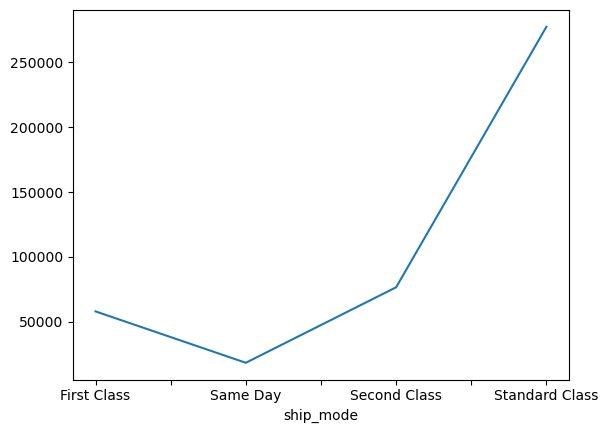

In [49]:
# Remember we found the total profit for each ship mode

# Let's save the results


# then just plot it


<AxesSubplot:xlabel='ship_mode'>

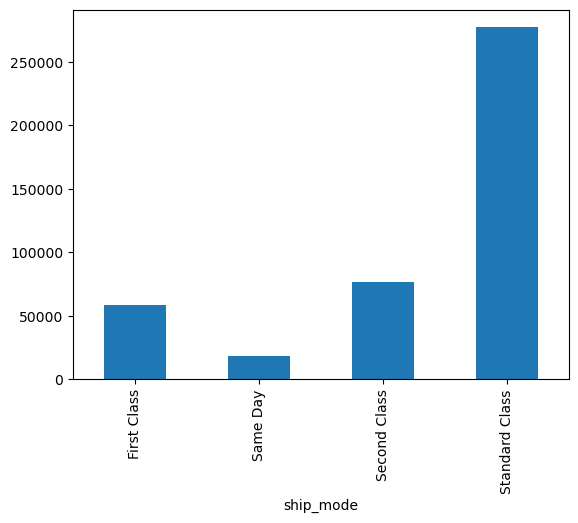

In [64]:
# Default is line plot

# Try bar plot


# Try other kinds: barh, pie

<AxesSubplot:xlabel='ship_mode,category'>

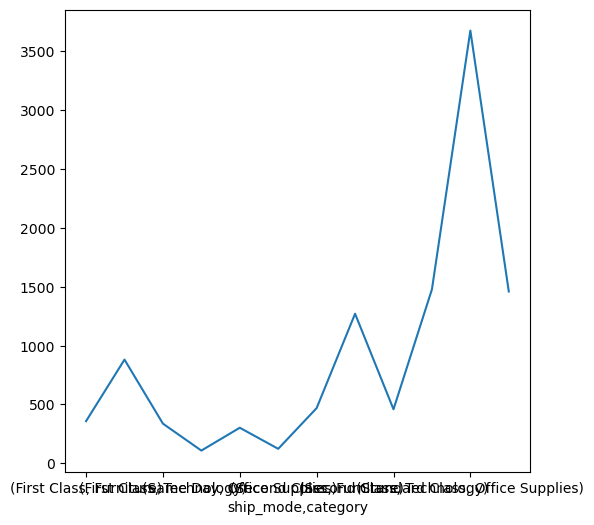

In [65]:
# Try to plot the multi level group:


# adjust the plot size: what does this show us? will a bar plot be better?


<AxesSubplot:xlabel='ship_mode'>

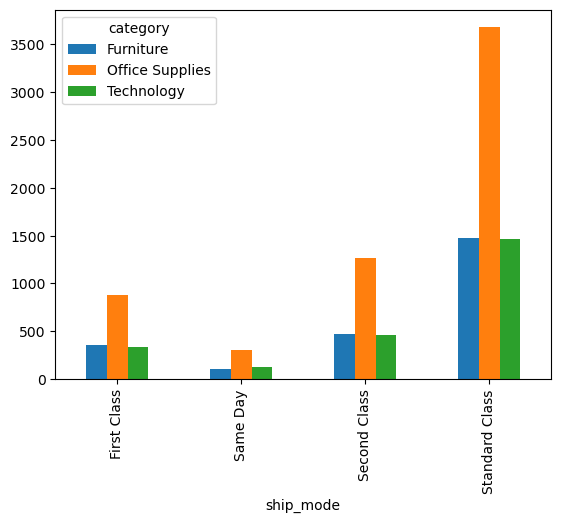

In [35]:
#unstack then plot
# Try to plot the multi level group:



## Apply functions for column operations

Apply functions allow us to perform a complex operation across an entire column highly efficiently.

For example, let's say we want to classify the margin category for the profit margin as *low*, *medium* or *high*.

The first step is writing a function, with the argument being the value we would receive from each cell in the column. This function will mutate the input, and return the result. This result will then be _applied_ to the source dataframe (if desired).

In [36]:
# create a function to classify a profit margin as low, medium or high
# Let's say 30% and above is high, between 10% and 30% is medium and anything else is low  


    


In [37]:
# Test the function with a sample value


'Medium'

Now we can _apply_ this function to our `pd.Series` object, returning the result (which we can use to create a new column, if we choose).

In [38]:
# Apply the function using the function name


0         Low
1        High
2        High
3        High
4        High
         ... 
10918    High
10919    High
10920    High
10921     Low
10922    High
Name: profit_margin, Length: 10923, dtype: object

In [39]:
# Save the results into a new column


In [40]:
merged.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,category,sub_category,product_name,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3 days,2022,7,3,Thursday,Low
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174 days,2020,7,4,Friday,High
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153 days,2020,7,3,Thursday,High
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67 days,2019,7,1,Tuesday,High
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122 days,2019,8,0,Monday,High


The `pd.DataFrame.apply` implementation is similar, however it effectively 'scrolls through' the columns and passes each one sequentially to your function:

```python
Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``).
```

It should only be used when you wish to apply the same function to all columns (or rows) of your `pd.DataFrame` object.

We can also use `pd.Series.apply()` with a **lambda expression**. This is an undeclared function and is commonly used for simple functions within the `.apply()` method. Let's use it to add $100 to our `product-cost_to_consumer` column. 

In [41]:
# prior to apply method


10913     45.48
10914     42.51
10915     42.51
10916     42.51
10917    121.50
10918     91.89
10919     91.89
10920     91.89
10921     91.89
10922     91.89
Name: unit_cost, dtype: float64

In [42]:
# add 100 dollars to each product cost


10913    145.48
10914    142.51
10915    142.51
10916    142.51
10917    221.50
10918    191.89
10919    191.89
10920    191.89
10921    191.89
10922    191.89
Name: unit_cost, dtype: float64

Boom! Maybe financing that new boat wasn't such a bad idea after all! Don't worry, we haven't set  new values back to the column so the changes aren't permanent. 

### Saving the file

Now that we have made the changes to our data, how do we save the DataFrame back to file?

We can use the Pandas `to_csv()` function:


In [43]:
# Saving the merged data to a new file called orders_by_product.csv, without adding an index column


## Wrap up

We've covered even more useful information! Here are the key takeaways:

- **Missing data** comes in many shapes and sizes. Before deciding how to handle it, we identify it exists. We then derive how the missingness is affecting our dataset, and make a determination about how to fill in values.

```python
# pro tip for identifying missing data
df.isnull().sum()
```

- **Merging DataFrames** helps us to join datasets on a key column, similar to SQL joins. 

```
pd.merge(left, right, how='inner', on='indexlabel')
```

- **Groupby** statements are particularly useful for a subsection-of-interest analysis. Specifically, zooming in on one condition, and determining relevant statstics.

```python
# group by 
df.groupby('column').agg['count', 'mean', 'max', 'min']
```

- **Apply functions** help us clean values across an entire DataFrame column. They are *like* a for loop for cleaning, but many times more efficient. They follow a common pattern:
1. Write a function that works on a single value
2. Test that function on a single value
3. Apply that function to a whole column

(The most confusing part of apply functions is that we write them with *a single value* in mind, and then apply them to many single values at once.)

#### Review Exercises / Homework

Let's practice what we have learned in this unit. We want to analyse the returns from the orders.

Q1. Read in the file `returns.csv`, then merge the `merged` DataFrame with the `returns` to determine if there were any returns on each order. Name the new DataFrame `merged_returns`.


In [44]:
# Q1 Answer 


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,sub_category,product_name,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,Bookcases,"Sauder Library with Doors, Traditional",360.51,3 days,2022,7,3,Thursday,Low,NaN
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,Bookcases,"Dania Corner Shelving, Metal",70.50,-174 days,2020,7,4,Friday,High,NaN
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,153 days,2020,7,3,Thursday,High,NaN
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,67 days,2019,7,1,Tuesday,High,NaN
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,Bookcases,"Dania Classic Bookcase, Pine",239.04,122 days,2019,8,0,Monday,High,NaN


Q2. How many missing values are there in the `returned` column of `merged_returns`?



In [45]:
# Q2 Answer


10138

Q3. Check the value_counts() of the `returned` column, with kwarg `dropna=False`.

In [46]:
# Q3 Answer


NaN    10138
Yes      785
Name: returned, dtype: int64

Q4. Fill the missing values in the `returned` column of the new `merged_returns` DataFrame with `'No'` 
Once you are satisfied it is correct, you can set `inplace=True`. 
You can run your answer to Q3 again to check the value counts after filling!

In [47]:
# Q4 Answer



Q5. Now that we have the `returned` column in the `merged_returns` DataFrame, use a groupby() to compare the mean sales for orders which were returned and those which were not.

In [48]:
# Q5 Answer



returned
No     325.128369
Yes    338.145324
Name: sales, dtype: float64

Q6. Use a multi-level groupby to compare the orders by `returned`, `category` then `ship_mode`. Return the means for all numeric columns. 

In [49]:
# Q6 Answer


sales  quantity  discount  \
returned category        ship_mode                                        
No       Furniture       First Class     529.076212  3.725857  0.146385   
                         Same Day        453.840259  3.598039  0.145588   
                         Second Class    513.152226  3.655814  0.143162   
                         Standard Class  583.623580  3.780364  0.142668   
         Office Supplies First Class     135.098406  3.719753  0.171926   
                         Same Day        139.887590  3.585106  0.162163   
                         Second Class    140.315702  3.672370  0.153037   
                         Standard Class  142.661795  3.770839  0.163340   
         Technology      First Class     579.872649  3.620579  0.149100   
                         Same Day        532.312659  3.991453  0.161282   
                         Second Class    560.680524  3.916667  0.134714   
                         Standard Class  570.463871  3.720913  0.138454   
Yes      Furniture       First Class     405.767708  3.702703  0.045405   
                         Same Day        901.518200  3.166667  0.028333   
                         Second Class    713.692100  4.358974  0.125641   
                         Standard Class  458.131392  3.825243  0.088639   
         Office Supplies First Class     222.937441  4.084507  0.113521   
                         Same Day        184.833840  4.500000  0.045500   
                         Second Class    134.129759  3.715686  0.113431   
                         Standard Class  181.470576  4.042735  0.117820   
         Technology      First Class     309.873808  2.961538  0.096154   
                         Same Day        816.582300  2.666667  0.011667   
                         Second Class    493.094731  3.743590  0.124103   
                         Standard Class  609.240662  4.019608  0.095097   

                                             profit  profit_margin  \
returned category        ship_mode                                   
No       Furniture       First Class      42.613502       0.085463   
                         Same Day         45.619082       0.104314   
                         Second Class     33.524436       0.072163   
                         Standard Class   55.961457       0.078294   
         Office Supplies First Class      13.504443       0.037099   
                         Same Day         11.572484       0.058298   
                         Second Class     18.186352       0.070470   
                         Standard Class   16.847668       0.051104   
         Technology      First Class      88.540752       0.070740   
                         Same Day         62.237787       0.066752   
                         Second Class     78.872452       0.097810   
                         Standard Class   83.027538       0.076377   
Yes      Furniture       First Class      57.407708       0.170811   
                         Same Day        295.993200       0.311667   
                         Second Class     48.376715       0.097692   
                         Standard Class   85.695082       0.156990   
         Office Supplies First Class      34.343075       0.077042   
                         Same Day         37.434840       0.249000   
                         Second Class     14.032994       0.104314   
                         Standard Class   27.610447       0.091880   
         Technology      First Class      54.229962       0.113077   
                         Same Day        142.737300       0.213333   
                         Second Class    116.752423       0.110513   
                         Standard Class  138.656250       0.140686   

                                          unit_cost   order_year  \
returned category        ship_mode                                 
No       Furniture       First Class     134.874112  2020.753894   
                         Same Day        111.514118  2020.696078   
  

Q7. Write a function called `discount_level` that receives a value `discount` and returns a string based on the following:
if the discount is 0.0, then return 'None', otherwise if discount is greater than 0.2, return 'High'. Any other value is considered 'Low'.


In [50]:
#Q7 Answer


Q8. Apply the function `discount_level` to the `discount` column of `merged_returns` to create a new column.

In [53]:
# Q8 Anwer


,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,...,product_name,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category,returned,discount_level
0,ID-2022-83625,2022-07-28,2022-07-31,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.400000,-255.864,...,"Sauder Library with Doors, Traditional",360.51,3 days,2022,7,3,Thursday,Low,No,High
1,IN-2020-85480,2020-07-31,2020-02-08,First Class,CS-12490,FUR-BO-10000021,243.060,2,0.149847,102.060,...,"Dania Corner Shelving, Metal",70.50,-174 days,2020,7,4,Friday,High,No,Low
2,IN-2020-21206,2020-07-02,2020-12-02,Standard Class,SC-20800,FUR-BO-10000035,1236.330,3,0.000000,519.210,...,"Dania Classic Bookcase, Pine",239.04,153 days,2020,7,3,Thursday,High,No,None
3,IN-2019-50060,2019-07-09,2019-09-14,Standard Class,MC-17575,FUR-BO-10000035,2472.660,6,0.149847,1038.420,...,"Dania Classic Bookcase, Pine",239.04,67 days,2019,7,1,Tuesday,High,No,Low
4,IN-2019-25889,2019-08-12,2019-12-12,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.100000,923.013,...,"Dania Classic Bookcase, Pine",239.04,122 days,2019,8,0,Monday,High,No,Low


Q9. Congratulations! Save the `merged_returns` file as 'returned_orders.csv'.
    

In [54]:
# Q9 Answer

